In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Clustering Data.csv")
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clothing ID                   1395 non-null   object 
 1   Review Sentiment              1368 non-null   float64
 2   Title Sentiment               1290 non-null   float64
 3   Review Polarity_Negative      1395 non-null   int64  
 4   Review Polarity_Positive      1395 non-null   float64
 5   Title Polarity_Negative       1395 non-null   int64  
 6   Title Polarity_Positive       1395 non-null   float64
 7   (0, 20]                       1395 non-null   int64  
 8   (20, 30]                      1395 non-null   int64  
 9   (30, 40]                      1395 non-null   int64  
 10  (40, 50]                      1395 non-null   int64  
 11  (50, 60]                      1395 non-null   int64  
 12  (60, 70]                      1395 non-null   int64  
 13  (70

In [3]:
X = df.copy()
X = X.drop(['Clothing ID'], axis=1)

# Handle Missing Values
X = X.dropna().iloc[:,:21]

# Perform Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

In [4]:
elbow_y = []
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_X)
    
    elbow_y.append(kmeans.inertia_)

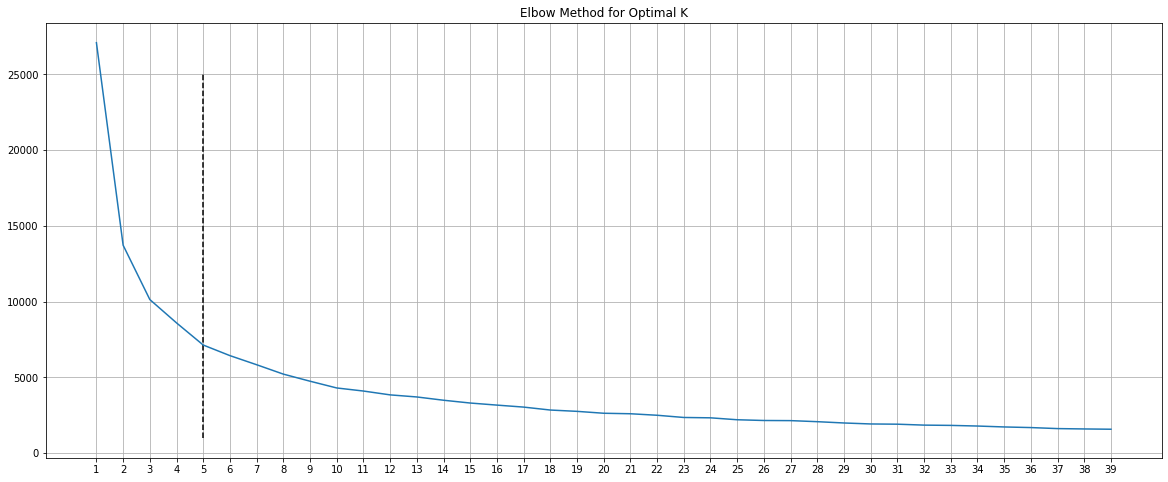

In [5]:
plt.figure(figsize=(20,8))
plt.title("Elbow Method for Optimal K")
plt.plot(range(1,40), elbow_y)

plt.vlines(5, 1000, 25000, linestyle='--')

plt.xticks(range(1,40))
plt.grid()

In [6]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=247)
kmeans.fit(scaled_X)

clusters = kmeans.predict(scaled_X)

cluster_df = df.dropna().copy()

cluster_df['cluster'] = clusters

cluster_df.head()

,Clothing ID,Review Sentiment,Title Sentiment,Review Polarity_Negative,Review Polarity_Positive,Title Polarity_Negative,Title Polarity_Positive,"(0, 20]","(20, 30]","(30, 40]",...,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates,cluster
1,1 Initmates,0.332933,0.348410,1,2.0,1,2.0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2,10 Initmates,0.995578,0.997503,0,1.0,0,1.0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,100 Initmates,-0.998651,-0.999972,1,0.0,1,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,3
4,1000 General,0.999317,0.988603,0,3.0,0,3.0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
5,1001 General,0.433425,0.405506,11,28.0,9,23.0,0,8,16,...,1,0,0,0,0,0,1,0,0,2


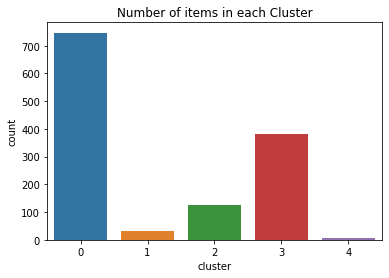

In [7]:
sns.countplot(x='cluster', data=cluster_df)
plt.title('Number of items in each Cluster')
plt.show()

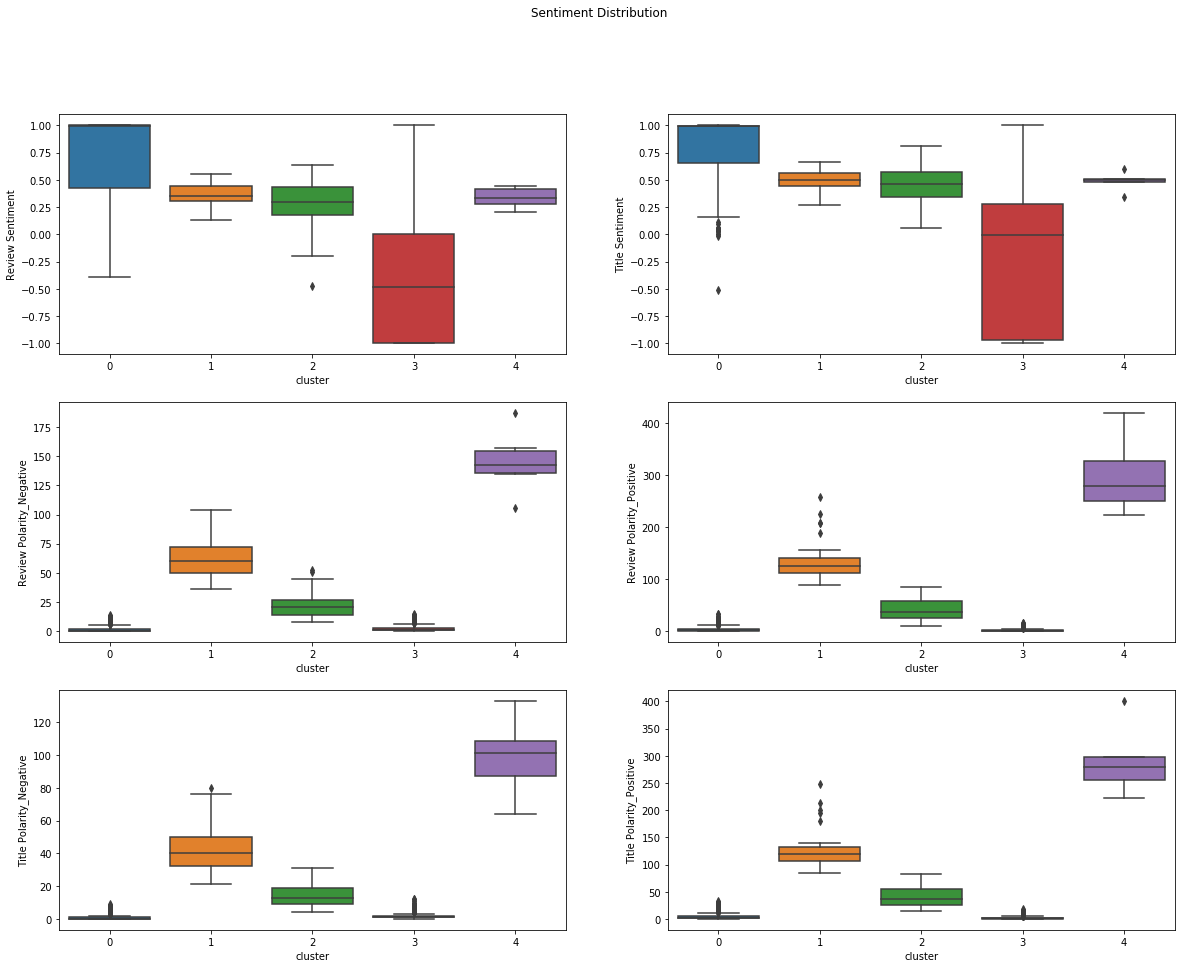

In [8]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

# Review Sentiment
sns.boxplot(x='cluster', y='Review Sentiment', data=cluster_df, ax=ax[0,0])


# Tile Sentiment
sns.boxplot(x='cluster', y='Title Sentiment', data=cluster_df, ax=ax[0,1])


# Review Sentiment
sns.boxplot(x='cluster', y='Review Polarity_Negative', data=cluster_df, ax=ax[1,0])


# Review Sentiment
sns.boxplot(x='cluster', y='Review Polarity_Positive', data=cluster_df, ax=ax[1,1])


# Review Sentiment
sns.boxplot(x='cluster', y='Title Polarity_Negative', data=cluster_df, ax=ax[2,0])


# Review Sentiment
sns.boxplot(x='cluster', y='Title Polarity_Positive', data=cluster_df, ax=ax[2,1])

fig.suptitle("Sentiment Distribution")
plt.show()

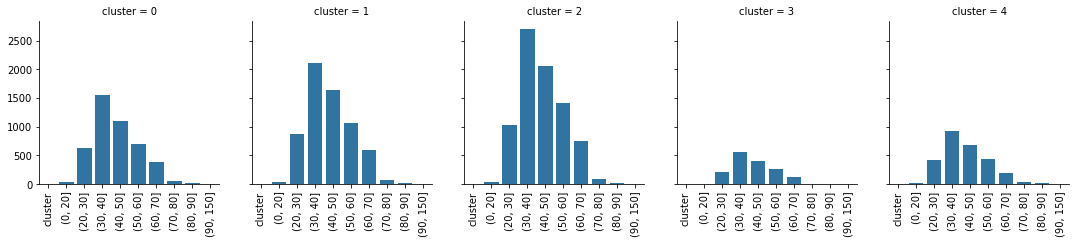

In [9]:
age_columns = cluster_df.iloc[:, 7:16].columns
cluster_age_df = cluster_df.groupby('cluster').sum()[age_columns].reset_index()

g = sns.FacetGrid(cluster_age_df, col='cluster', col_wrap=6)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

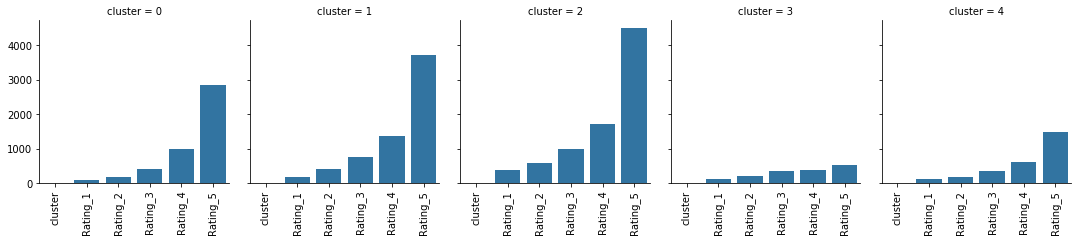

In [10]:
rating_columns = cluster_df.iloc[:, 16:21].columns
cluster_rating_df = cluster_df.groupby('cluster').sum()[rating_columns].reset_index()

g = sns.FacetGrid(cluster_rating_df, col='cluster', col_wrap=6)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

#### Inspecting Cluster 3

In [11]:
c3 = cluster_df[cluster_df['cluster'] == 3]
c3.head()

,Clothing ID,Review Sentiment,Title Sentiment,Review Polarity_Negative,Review Polarity_Positive,Title Polarity_Negative,Title Polarity_Positive,"(0, 20]","(20, 30]","(30, 40]",...,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates,cluster
3,100 Initmates,-0.998651,-0.999972,1,0.0,1,0.0,0,0,0,...,0,0,1,0,0,0,0,0,1,3
9,1004 General,0.138674,-0.270388,3,4.0,4,2.0,0,2,2,...,1,0,0,0,0,0,1,0,0,3
13,1006 General,-0.267196,-0.660711,3,2.0,4,1.0,0,1,3,...,1,0,0,0,0,0,1,0,0,3
21,1010 General Petite,-0.999828,-0.551022,1,0.0,1,0.0,0,0,0,...,1,0,0,0,0,0,0,1,0,3
25,1012 General Petite,-0.988855,0.999269,1,0.0,0,1.0,0,0,0,...,1,0,0,0,0,0,0,1,0,3


#### 1. Number of Negative Reviews vs Positive Reviews

In [12]:
c3.mean()[['Review Polarity_Negative', 'Review Polarity_Positive']]

Review Polarity_Negative    2.424084
Review Polarity_Positive    1.609948
dtype: float64

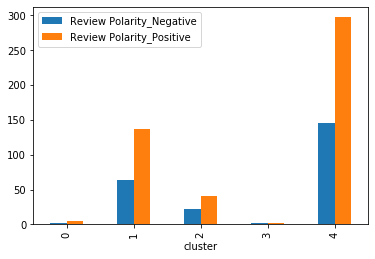

In [13]:
cluster_df.groupby('cluster').mean()[['Review Polarity_Negative', 'Review Polarity_Positive']].plot(kind='bar')

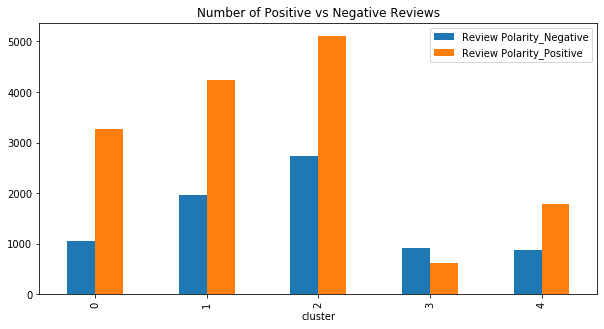

In [14]:
a = cluster_df['cluster'].value_counts().sort_index()
b = cluster_df.groupby('cluster').mean()[['Review Polarity_Negative', 'Review Polarity_Positive']]

fig,ax=plt.subplots(figsize=(10,5))
(b * a.values.reshape(-1,1)).plot(kind='bar', ax=ax)
plt.title("Number of Positive vs Negative Reviews")
plt.show()

#### Comment - Items in cluster 3 tend to have more negative reviews. 

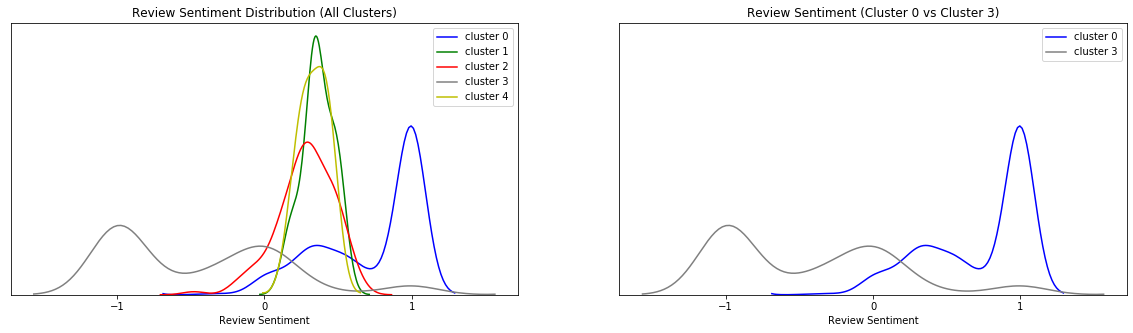

In [15]:
fig,ax=plt.subplots(1, 2, figsize=(20,5), sharey=True)

colors = ['b', 'g', 'r', 'grey', 'y']

for cluster in range(k):
    d = cluster_df[cluster_df['cluster'] == cluster]
    sns.distplot(d['Review Sentiment'], label= f"cluster {cluster}", ax=ax[0], hist=False, color=colors[cluster])
    
    if cluster in [0,3]:
        d = cluster_df[cluster_df['cluster'] == cluster]
        sns.distplot(d['Review Sentiment'], label= f"cluster {cluster}", ax=ax[1], hist=False, color=colors[cluster])

ax[0].set_title("Review Sentiment Distribution (All Clusters)")
ax[0].set_xticks([-1,0,1])
ax[1].set_xticks([-1,0,1])
ax[0].set_yticks([])
ax[1].set_title("Review Sentiment (Cluster 0 vs Cluster 3)")
plt.show()

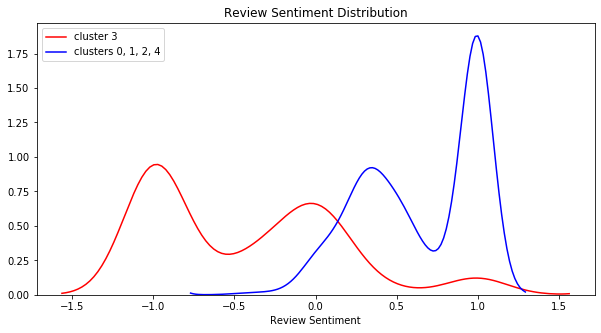

In [16]:
fig,ax=plt.subplots(figsize=(10,5))

colors = ['b', 'g', 'r', 'grey', 'y']

cluster = 3
d3 = cluster_df[cluster_df['cluster'] == cluster]
sns.distplot(d3['Review Sentiment'], label= "cluster 3", ax=ax, hist=False, color='r')

d_rest = cluster_df[cluster_df['cluster'] != cluster]
sns.distplot(d_rest['Review Sentiment'], label= "clusters 0, 1, 2, 4", ax=ax, hist=False, color='b')

plt.title("Review Sentiment Distribution")
plt.legend()
plt.show()

We can call :
- cluster 3 - Generally disliked products
- clusters 0, 1, 2, 4 - Generally liked products

#### Dendrogram to Inspect the Intra-Cluster Similarity

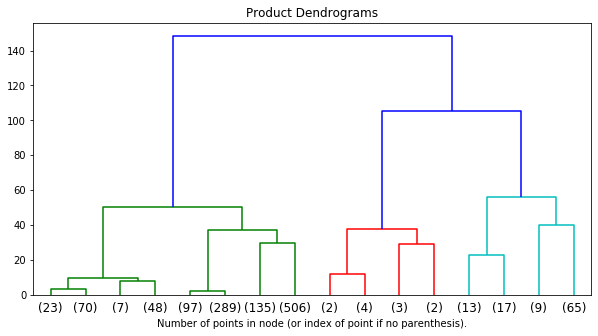

In [17]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=80, n_clusters=None)

model = model.fit(scaled_X)

fig,ax=plt.subplots(figsize=(10,5))
plt.title('Product Dendrograms')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

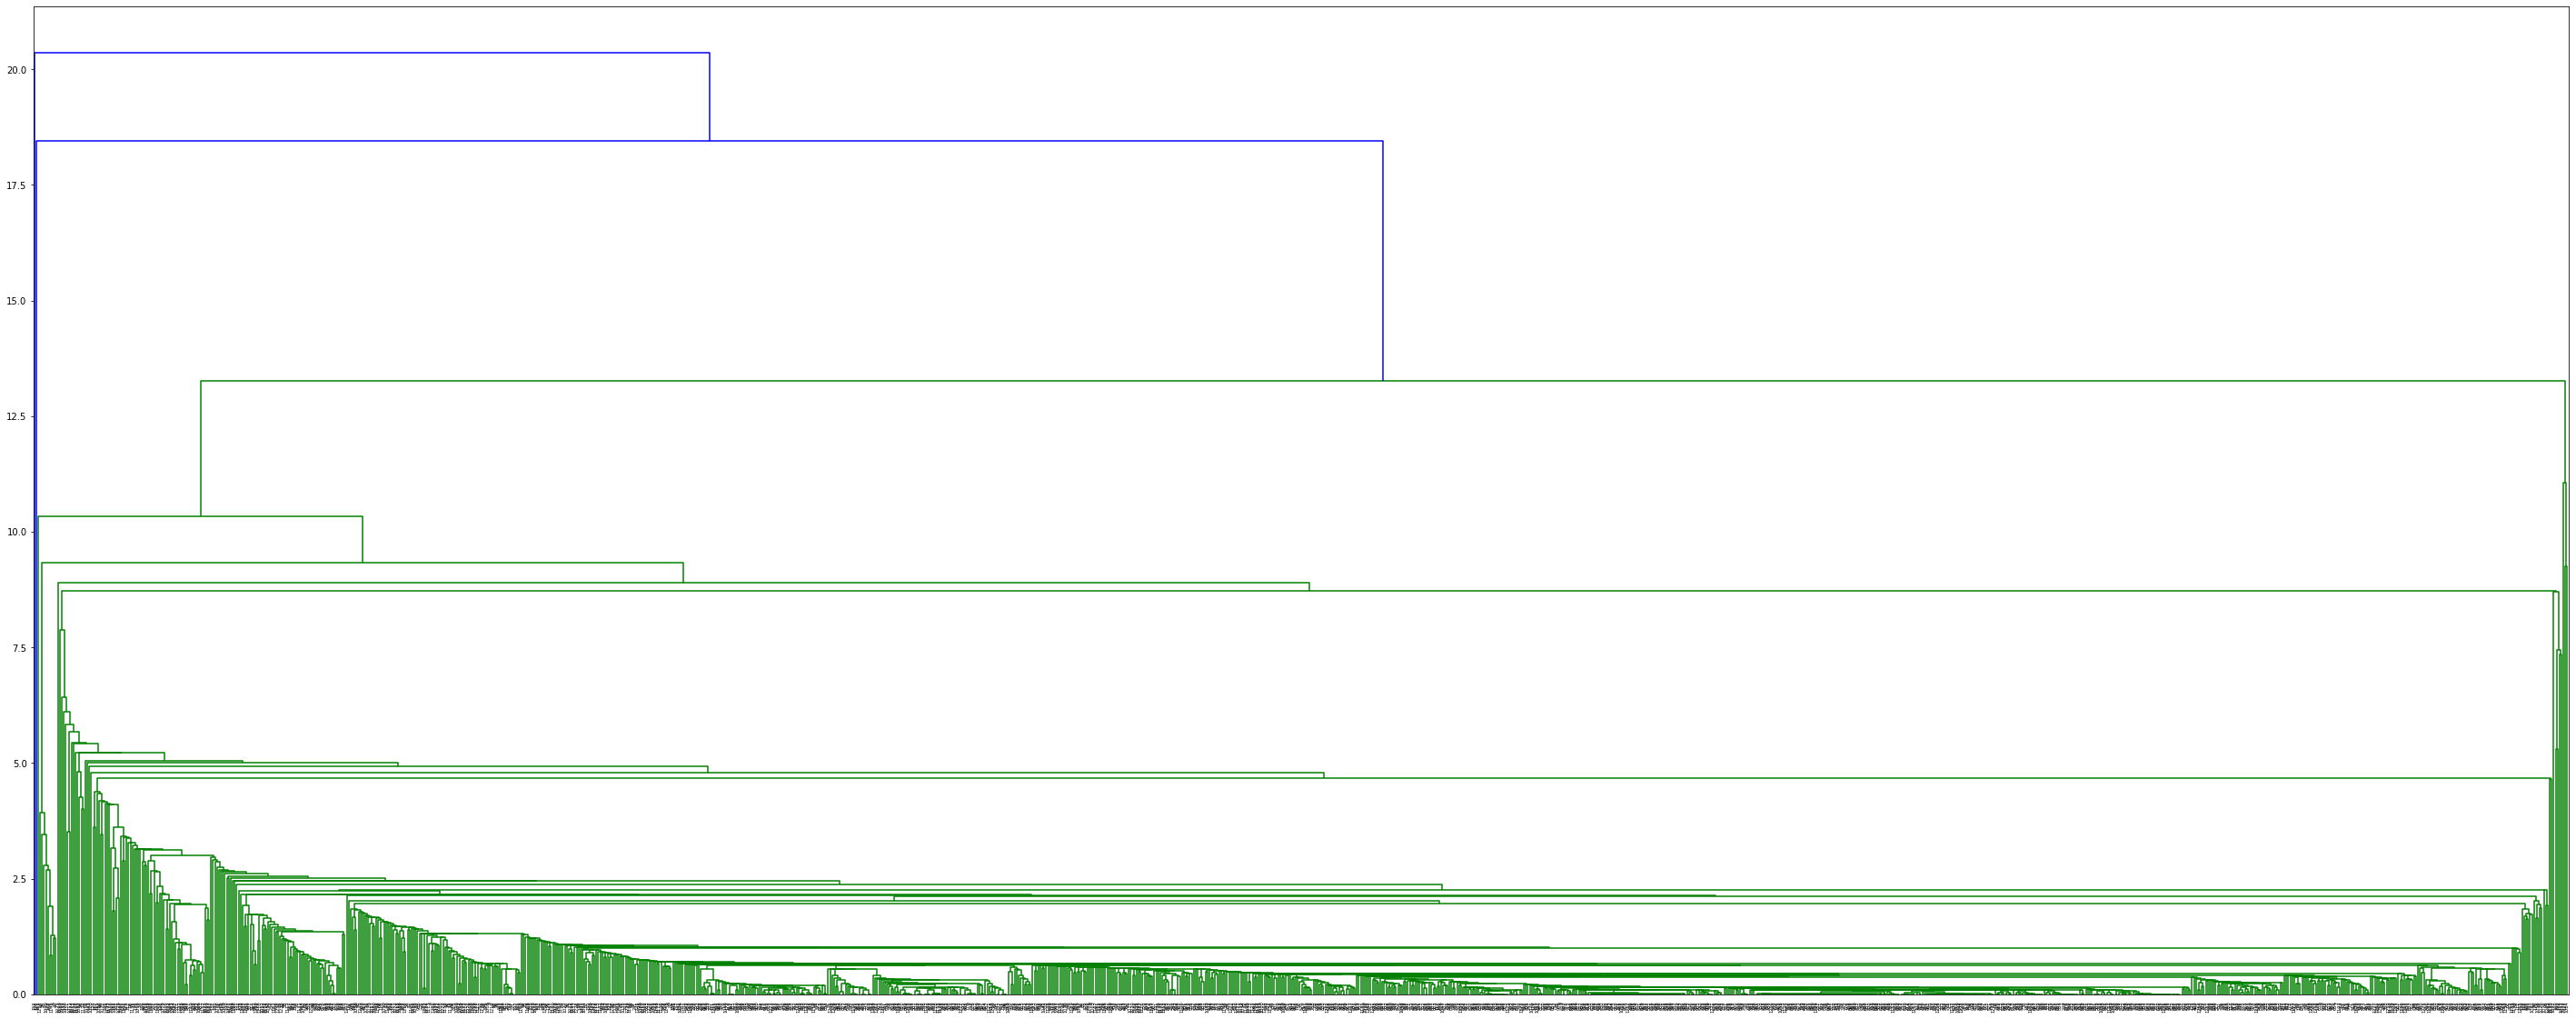

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(scaled_X, 'single')

plt.figure(figsize=(50, 20))
dendrogram(linked)
plt.show()

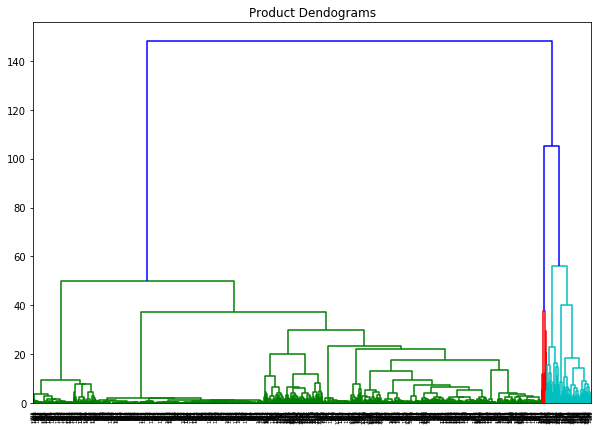

In [19]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Product Dendograms")
dend = shc.dendrogram(shc.linkage(scaled_X, method='ward'))

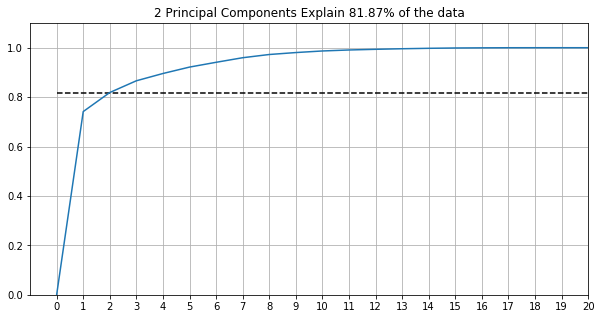

In [20]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(scaled_X)
scores = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(0, len(scores)+1), np.concatenate((np.array([0]), np.cumsum(scores))))
plt.xticks(range(len(scores)+1))
# plt.vlines(1, 0.75, np.cumsum(scores)[1], linestyle='--')
plt.hlines(np.cumsum(scores)[1], 0, 20, linestyle='--')
plt.xlim([-1,20])
plt.ylim([0,1.1])
plt.title(f"2 Principal Components Explain {np.round(np.cumsum(scores)[1] * 100, 2)}% of the data")
plt.grid()
plt.show()

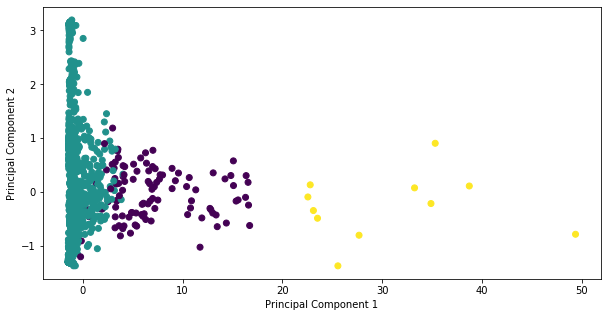

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_predicitons = cluster.fit_predict(scaled_X)

pca = PCA(n_components=3)

pca_X_scaled = pca.fit_transform(scaled_X)

plt.figure(figsize=(10, 5))
plt.scatter(pca_X_scaled[:,0], pca_X_scaled[:,1], c=cluster_predicitons)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
# plt.legend(['cluster 1', 'cluster 2', 'cluster 3'])
plt.show()

# Agglomerative Clustering

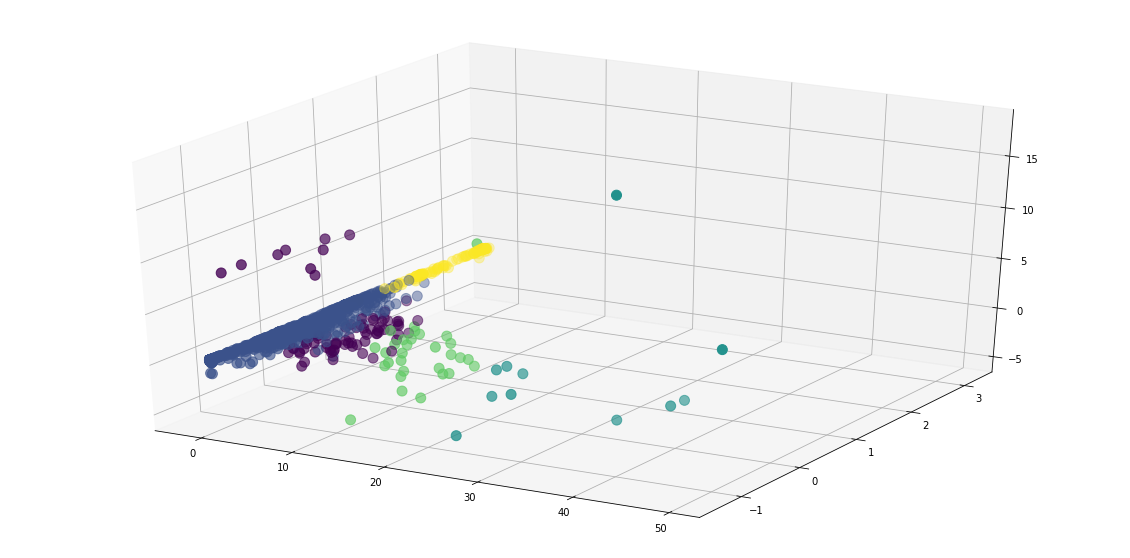

In [22]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Agglomerative Clustering
k = 5
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_predicitons = cluster.fit_predict(scaled_X)

cluster_df['cluster_agg'] = cluster_predicitons

# PCA for Dimensionality Reduction and Plotting 
pca = PCA(n_components=3)
pca_X_scaled = pca.fit_transform(scaled_X)

# Plotting
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(pca_X_scaled[:,0], pca_X_scaled[:,1], pca_X_scaled[:,2], c=cluster_predicitons, s=100);
plt.show()

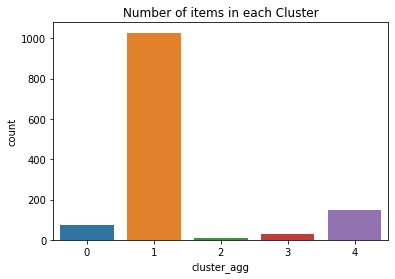

In [23]:
sns.countplot(x='cluster_agg', data=cluster_df)
plt.title('Number of items in each Cluster')
plt.show()

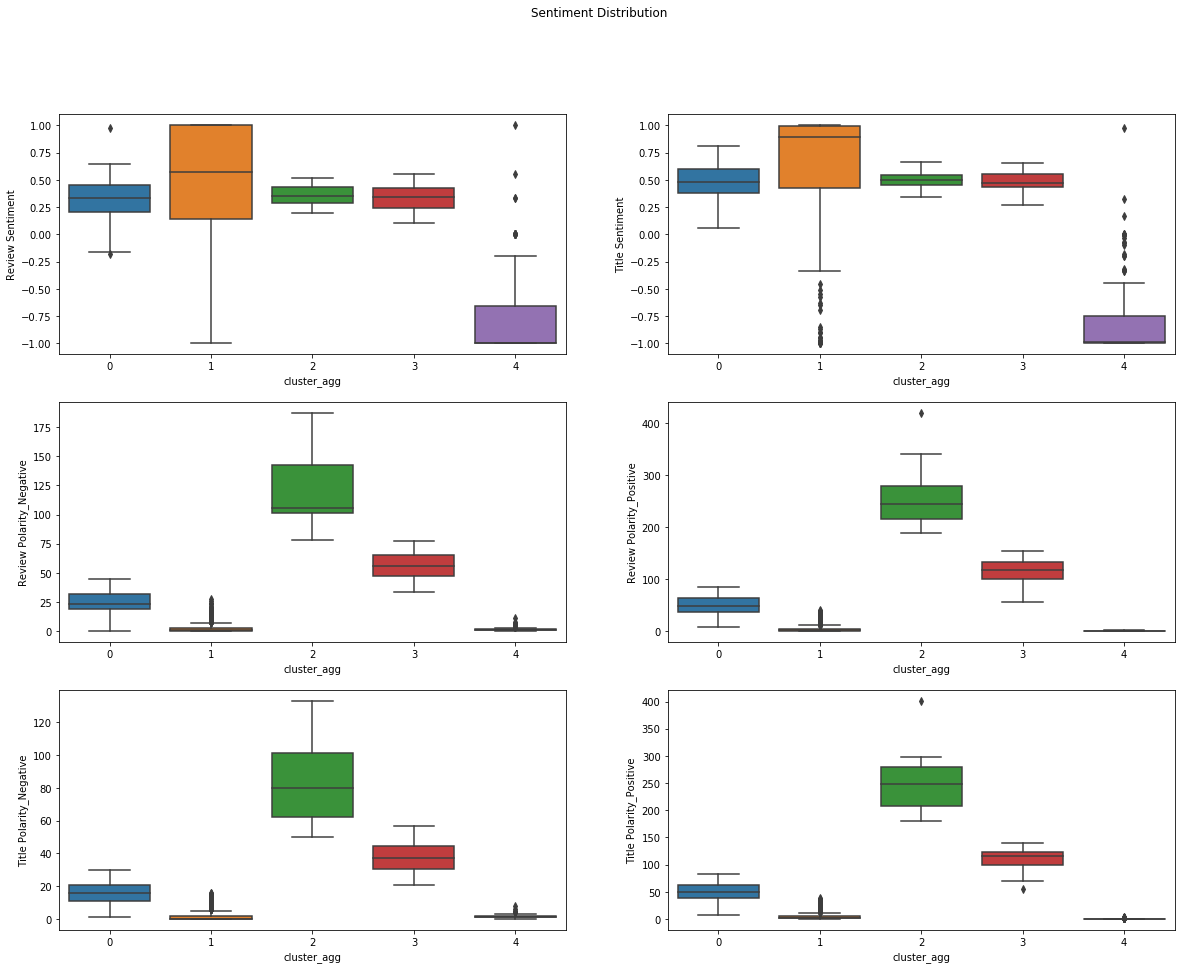

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

# Review Sentiment
sns.boxplot(x='cluster_agg', y='Review Sentiment', data=cluster_df, ax=ax[0,0])


# Tile Sentiment
sns.boxplot(x='cluster_agg', y='Title Sentiment', data=cluster_df, ax=ax[0,1])


# Review Sentiment
sns.boxplot(x='cluster_agg', y='Review Polarity_Negative', data=cluster_df, ax=ax[1,0])


# Review Sentiment
sns.boxplot(x='cluster_agg', y='Review Polarity_Positive', data=cluster_df, ax=ax[1,1])


# Review Sentiment
sns.boxplot(x='cluster_agg', y='Title Polarity_Negative', data=cluster_df, ax=ax[2,0])


# Review Sentiment
sns.boxplot(x='cluster_agg', y='Title Polarity_Positive', data=cluster_df, ax=ax[2,1])

fig.suptitle("Sentiment Distribution")
plt.show()

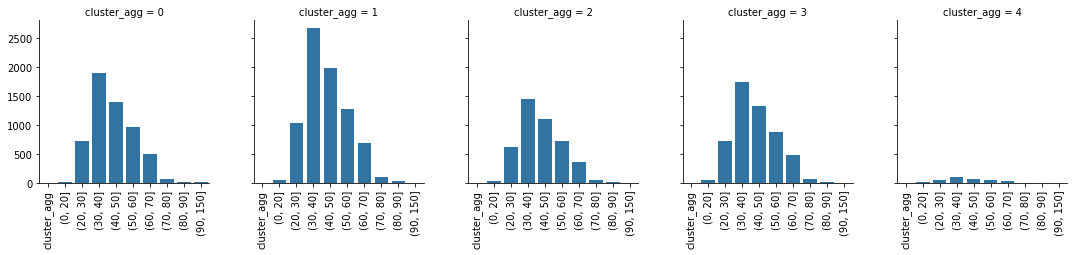

In [25]:
age_columns = cluster_df.iloc[:, 7:16].columns
cluster_age_df = cluster_df.groupby('cluster_agg').sum()[age_columns].reset_index()

g = sns.FacetGrid(cluster_age_df, col='cluster_agg', col_wrap=6)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

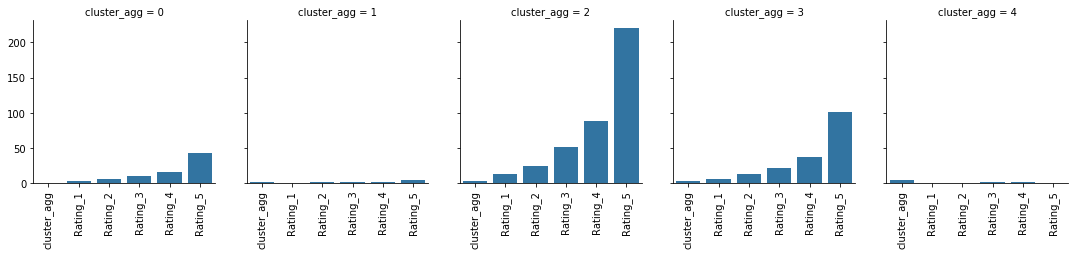

In [26]:
rating_columns = cluster_df.iloc[:, 16:21].columns
cluster_rating_df = cluster_df.groupby('cluster_agg').mean()[rating_columns].reset_index()

g = sns.FacetGrid(cluster_rating_df, col='cluster_agg', col_wrap=6)
g.map_dataframe(sns.barplot)

# plt.xticks(rotation=90)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

#### Inspecting Cluster 4

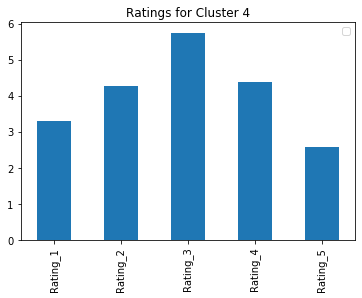

In [27]:
rating_columns = cluster_df.iloc[:, 16:21].columns
cluster_rating_df = cluster_df.groupby('cluster_agg').mean()[rating_columns].reset_index()

c4 = cluster_rating_df[cluster_rating_df.index == 4] * 10

c4.iloc[:,1:].T.plot(kind='bar')
plt.title("Ratings for Cluster 4")
plt.legend([])
plt.show()

In [28]:
c3 = cluster_df[cluster_df['cluster_agg'] == 4]
c3.head()

,Clothing ID,Review Sentiment,Title Sentiment,Review Polarity_Negative,Review Polarity_Positive,Title Polarity_Negative,Title Polarity_Positive,"(0, 20]","(20, 30]","(30, 40]",...,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Division Name_General,Division Name_General Petite,Division Name_Initmates,cluster,cluster_agg
3,100 Initmates,-0.998651,-0.999972,1,0.0,1,0.0,0,0,0,...,0,1,0,0,0,0,0,1,3,4
13,1006 General,-0.267196,-0.660711,3,2.0,4,1.0,0,1,3,...,0,0,0,0,0,1,0,0,3,4
21,1010 General Petite,-0.999828,-0.551022,1,0.0,1,0.0,0,0,0,...,0,0,0,0,0,0,1,0,3,4
51,103 Initmates,-0.561063,-0.680277,1,0.0,1,0.0,0,0,0,...,0,1,0,0,0,0,0,1,3,4
66,1039 General,-0.563017,-0.193527,7,2.0,4,3.0,0,2,4,...,0,0,0,0,0,1,0,0,3,4


#### 1. Number of Negative Reviews vs Positive Reviews

In [29]:
c3.mean()[['Review Polarity_Negative', 'Review Polarity_Positive']]

Review Polarity_Negative    1.702703
Review Polarity_Positive    0.304054
dtype: float64

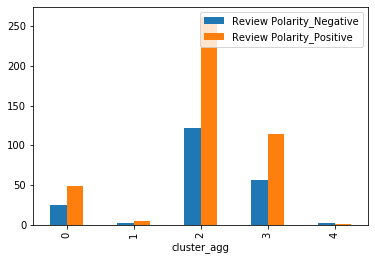

In [30]:
cluster_df.groupby('cluster_agg').mean()[['Review Polarity_Negative', 'Review Polarity_Positive']].plot(kind='bar')

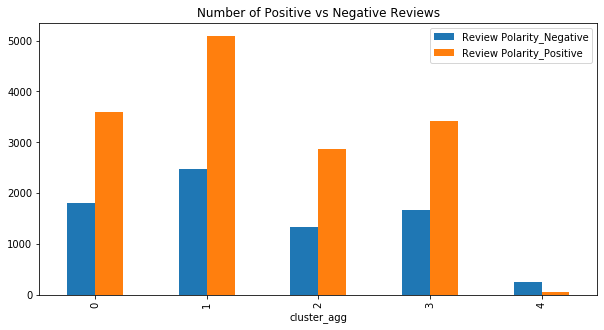

In [31]:
a = cluster_df['cluster_agg'].value_counts().sort_index()
b = cluster_df.groupby('cluster_agg').mean()[['Review Polarity_Negative', 'Review Polarity_Positive']]

fig,ax=plt.subplots(figsize=(10,5))
(b * a.values.reshape(-1,1)).plot(kind='bar', ax=ax)
plt.title("Number of Positive vs Negative Reviews")
plt.show()

#### Comment - Items in cluster 4 tend to have more negative reviews. 

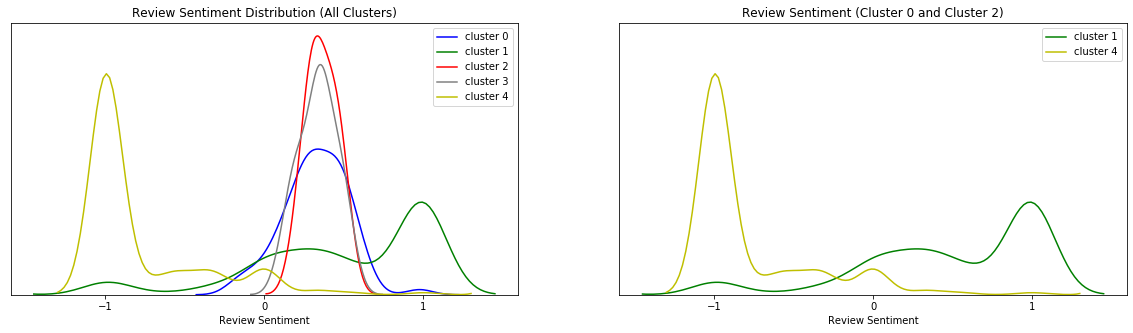

In [32]:
fig,ax=plt.subplots(1, 2, figsize=(20,5), sharey=True, sharex=True)

colors = ['b', 'g', 'r', 'grey', 'y']

for cluster in range(k):
    d = cluster_df[cluster_df['cluster_agg'] == cluster]
    sns.distplot(d['Review Sentiment'], label= f"cluster {cluster}", ax=ax[0], hist=False, color=colors[cluster])
    
    if cluster in [4,1]:
        d = cluster_df[cluster_df['cluster_agg'] == cluster]
        sns.distplot(d['Review Sentiment'], label= f"cluster {cluster}", ax=ax[1], hist=False, color=colors[cluster])

ax[0].set_title("Review Sentiment Distribution (All Clusters)")
ax[0].set_xticks([-1,0,1])
ax[1].set_xticks([-1,0,1])
ax[0].set_yticks([])
ax[1].set_title("Review Sentiment (Cluster 0 and Cluster 2)")
plt.show()

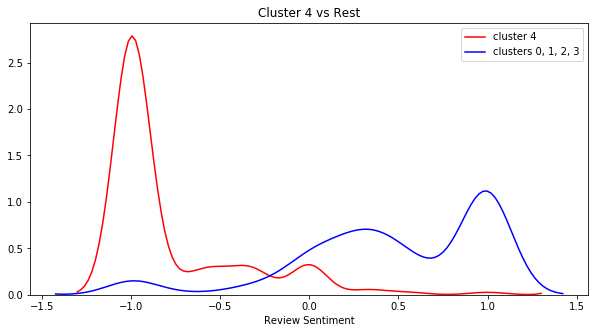

In [33]:
fig,ax=plt.subplots(figsize=(10,5))

colors = ['b', 'g', 'r', 'grey', 'y']

cluster = 4
d3 = cluster_df[cluster_df['cluster_agg'] == cluster]
sns.distplot(d3['Review Sentiment'], label= "cluster 4", ax=ax, hist=False, color='r')

d_rest = cluster_df[cluster_df['cluster_agg'] != cluster]
sns.distplot(d_rest['Review Sentiment'], label= "clusters 0, 1, 2, 3", ax=ax, hist=False, color='b')

plt.title("Cluster 4 vs Rest")
plt.legend()
plt.show()

We can call :
- cluster 4 - Generally disliked products
- Remaining 0, 1, 2, 3 - Generally liked products

# K-Means Clustering

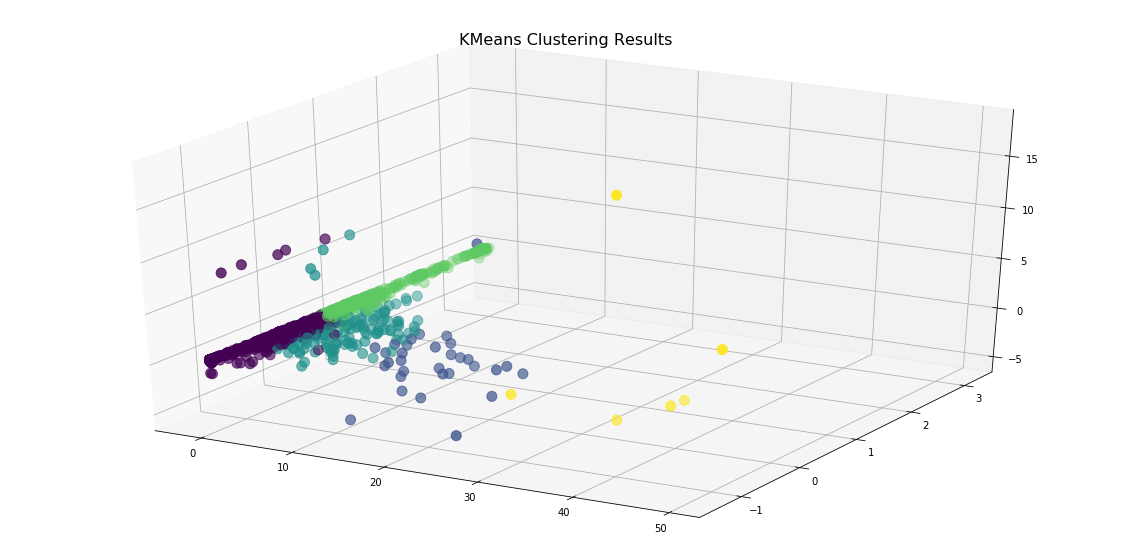

In [34]:
# KMeans Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=247)
kmeans.fit(scaled_X)
cluster_predictions = kmeans.predict(scaled_X)

# PCA for Dimensionality Reduction and Plotting 
pca = PCA(n_components=3)
pca_X_scaled = pca.fit_transform(scaled_X)

# Plotting
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(pca_X_scaled[:,0], pca_X_scaled[:,1], pca_X_scaled[:,2], c=cluster_predictions, s=100);
ax.set_title('KMeans Clustering Results', fontsize=16)
plt.show()

# Comparison - KMEANS vs AGGLOMERATIVE CLUSTERING

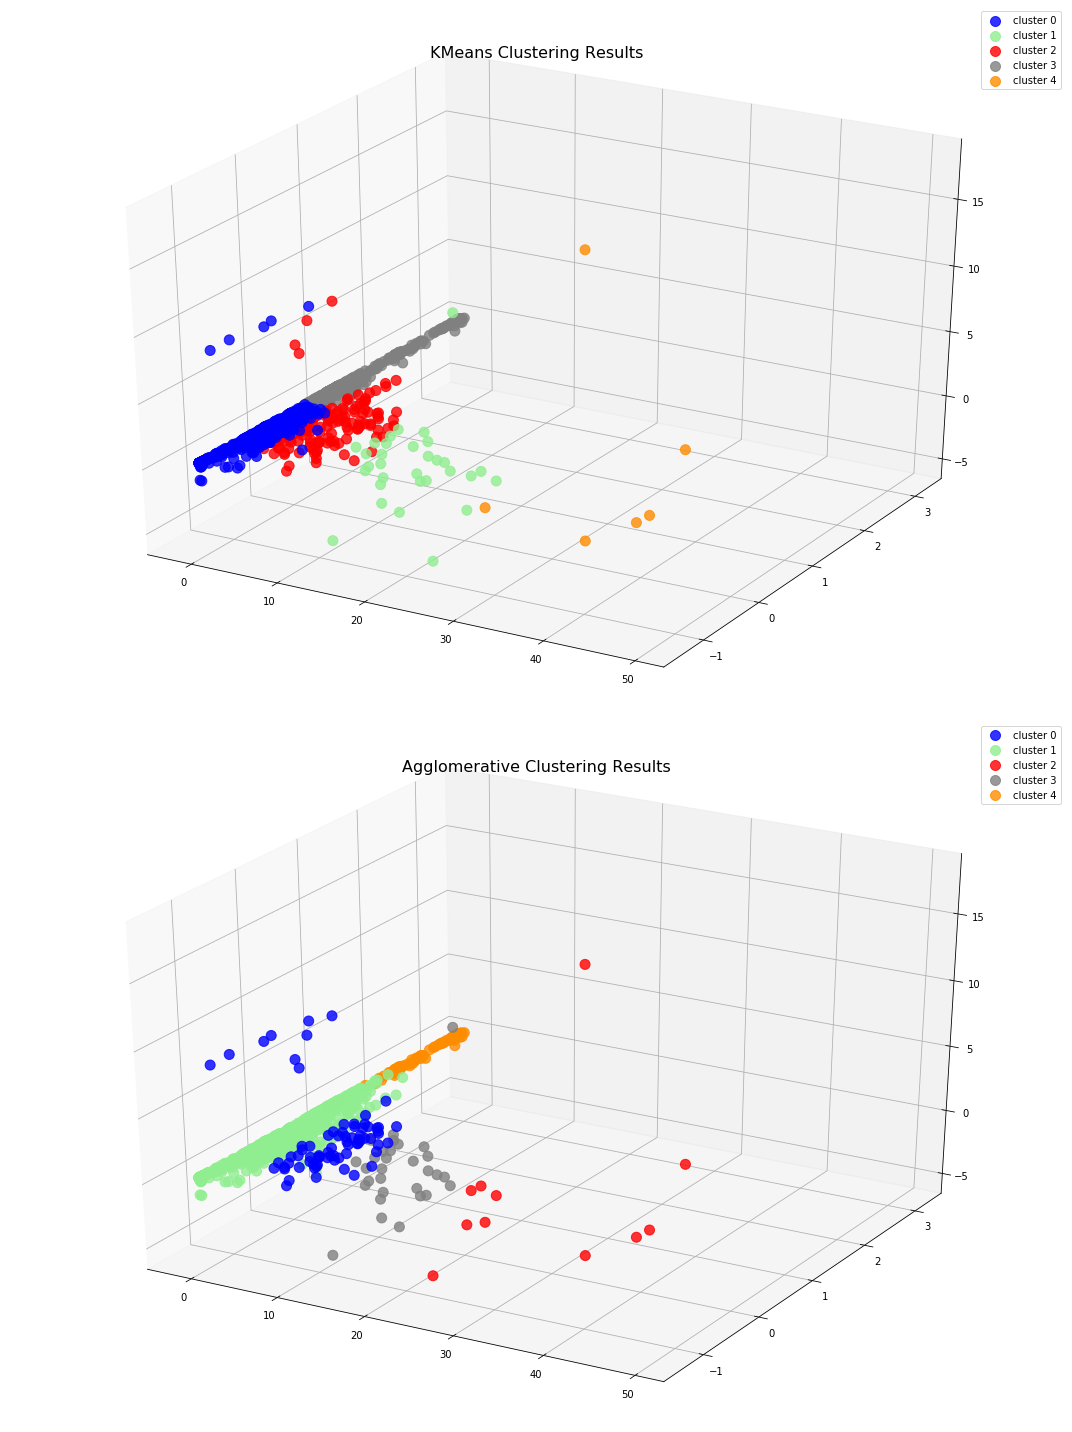

In [35]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# PCA for Dimensionality Reduction and Plotting 
pca = PCA(n_components=3)
pca_X_scaled = pca.fit_transform(scaled_X)

# Plotting
fig = plt.figure(figsize=(15,20))

# KMeans Clustering
k = 5
kmeans = KMeans(n_clusters=k, random_state=247)
kmeans.fit(scaled_X)
cluster_predictions = kmeans.predict(scaled_X)

# KMEANs PLOT
ax = fig.add_subplot(2, 1, 1, projection='3d')
colors = ['blue', 'lightgreen', 'red', 'grey', 'darkorange']
for cluster in range(k):
    d = pca_X_scaled[cluster_predictions == cluster]
    ax.scatter3D(d[:,0], d[:,1], d[:,2], c=colors[cluster], s=100, label=f"cluster {cluster}", alpha=0.8);
ax.set_title('KMeans Clustering Results', fontsize=16)
ax.legend()

# Agglomerative Clustering
k = 5
cluster_agg = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster_predictions = cluster_agg.fit_predict(scaled_X)

# AGGLOMERATIVE CLUSTERING PLOT
ax = fig.add_subplot(2, 1, 2, projection='3d')
for cluster in range(k):
    d = pca_X_scaled[cluster_predictions == cluster]
    ax.scatter3D(d[:,0], d[:,1], d[:,2], c=colors[cluster], s=100, label=f"cluster {cluster}", alpha=0.8);
ax.set_title('Agglomerative Clustering Results', fontsize=16)
ax.legend()

fig.tight_layout()
plt.show()

## Products Worth Inspecting

1. From K-Means - Cluster 3 (For Disliked Products)
2. From Agglomerative Clustering - Clusters 4 (For Disliked Products)